In [3]:
using JLD
using Statistics
using StatsBase 
using LinearAlgebra
using JLD2
using FileIO

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278


In [4]:
using MultivariateStats

In [29]:
include("set.jl")


# latex_width = 421.10046 # \the\textwidth latex command

latex_width = 426.7
latex_prl_width = 486.0 # pt for two 2 cols.
best_size = set_size(latex_width, fraction=1)

(5.90424795904248, 3.64902591669545)

In [20]:
data = load("../data/experiment/images.jld")

Dict{String,Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [21]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

In [22]:
intensity(x) = [sum(x, dims=(2, 3))...]

intensity (generic function with 1 method)

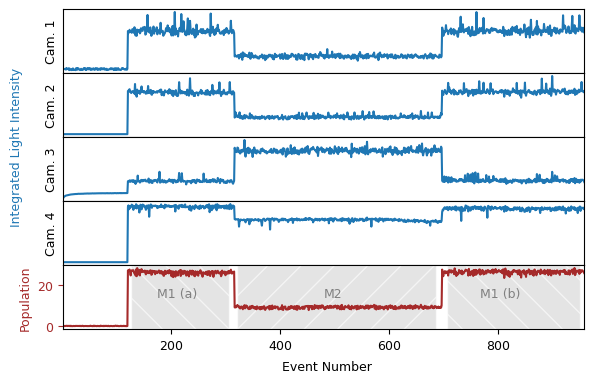

In [32]:
size = set_size(latex_prl_width, ratio=:golden, fraction=1)
c1 = "brown"
c2 = "C0"
fig, ax = plt.subplots(5,1, figsize=size, sharex=true)

ax[1].plot(enumerate_events, intensity(cam_1), color=c2)
ax[2].plot(enumerate_events, intensity(cam_2), color=c2)
ax[3].plot(enumerate_events, intensity(cam_3), color=c2)
ax[4].plot(enumerate_events, intensity(cam_4), color=c2)
ax[5].plot(enumerate_events, charge, color=c1)

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])
ax[4].set_yticks([])

ax[1].set_ylabel("Cam. 1")
ax[2].set_ylabel("Cam. 2")
ax[3].set_ylabel("Cam. 3")
ax[4].set_ylabel("Cam. 4")
# ax[5].set_ylabel("q [e11]")
ax[5].set_ylabel("Population")

ax[5].yaxis.label.set_color(c1)
ax[5].tick_params(axis="y", colors=c1)

ax[5].set_xlim(1, maximum(enumerate_events))

ax[5].axvspan(125, 305, hatch="\\",  facecolor="lightgray",edgecolor="white", alpha=0.6)
ax[5].axvspan(705, 950, hatch="\\",  facecolor="lightgray",edgecolor="white", alpha=0.6)
ax[5].axvspan(320, 685, hatch="/",  facecolor="lightgray",edgecolor="white", alpha=0.6)

ax[5].text(0.8,0.5,"M1 (b)", transform=ax[5].transAxes, color="gray",)
ax[5].text(0.18,0.5,"M1 (a)", transform=ax[5].transAxes, color="gray",)
ax[5].text(0.5,0.5,"M2", transform=ax[5].transAxes, color="gray")

fig.subplots_adjust(hspace=0.0, wspace=0.0)

fig.text(0.046, 0.55, "Integrated Light Intensity", va="center", rotation="vertical", color=c2)
fig.text(0.45, 0.02, "Event Number", va="center", rotation="horizontal")

fig.savefig("exp-info-2.pdf", bbox_inches = "tight")

In [24]:
x_pix = [0.0271,0.0216,0.114,0.0303]
y_pix = [0.0305,0.0234,0.125,0.0298]

4-element Array{Float64,1}:
 0.0305
 0.0234
 0.125
 0.0298

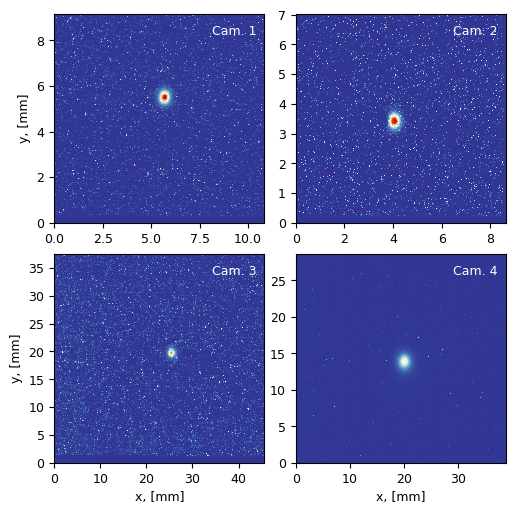

PyObject Text(0.5, 23.0, 'x, [mm]')

In [11]:
size = set_size(latex_width, ratio=1, fraction=1)

fig, ax = plt.subplots(2,2, figsize=size)

fig.subplots_adjust(hspace=0.15, wspace=0.15)

ev_number = 200

ax[1,1].pcolormesh(collect(0:400) .* 0.0271, collect(0:300) .* 0.0305,  cam_1[ev_number,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(collect(0:400) .* 0.0216, collect(0:300) .* 0.0234, cam_2[ev_number,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(collect(0:400) .* 0.114, collect(0:300) .* 0.125, cam_3[ev_number,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(collect(0:1280) .* 0.0303, collect(0:960) .* 0.0298, cam_4[ev_number,:,:], cmap="RdYlBu_r")

ax[1,1].text(0.75,0.9,"Cam. 1", transform=ax[1].transAxes, color="white", )
ax[1,2].text(0.75,0.9,"Cam. 2", transform=ax[1,2].transAxes, color="white",)
ax[2,1].text(0.75,0.9,"Cam. 3", transform=ax[2,1].transAxes, color="white",)
ax[2,2].text(0.75,0.9,"Cam. 4", transform=ax[2,2].transAxes, color="white",)

ax[1,1].set_ylabel("y, [mm]")
ax[2,1].set_ylabel("y, [mm]")

ax[2,1].set_xlabel("x, [mm]")
ax[2,2].set_xlabel("x, [mm]")

# fig.savefig("event-example.png", bbox_inches = "tight")

In [12]:
function linreg(x, y; bias_c=true)
    
	X = Array{Float64}(undef, length(x),1)
	Y = Vector{Float64}(undef, length(y))
	X[1:length(x),1] .= x
	Y[1:length(y)] .= y
	sol = llsq(X, Y)
	coeff, bias = sol[1], sol[2]
    
    if bias_c == true
        g1(x) = bias + coeff*x 
        return g1, (coeff, bias)
    end
    
    if bias_c == false
        g2(x) = coeff*x
        return g2, (coeff, bias)
    end
    
end

linreg (generic function with 1 method)

In [13]:
minimum(charge[5 .< charge .< 15 ])

7.766900062561035

In [14]:
y1 = intensity(cam_1)
y2 = intensity(cam_2)
y3 = intensity(cam_3)
y4 = intensity(cam_4);

mask = 5 .< charge .< 15 
lin_int11, coeff11  = linreg(charge[mask], y1[mask])
lin_int12, coeff12  = linreg(charge[mask], y2[mask])
lin_int13, coeff13  = linreg(charge[mask], y3[mask])
lin_int14, coeff14  = linreg(charge[mask], y4[mask])


mask = 15 .< charge
lin_int21, coeff21  = linreg(charge[mask], y1[mask])
lin_int22, coeff22  = linreg(charge[mask], y2[mask])
lin_int23, coeff23  = linreg(charge[mask], y3[mask])
lin_int24, coeff24  = linreg(charge[mask], y4[mask])

ch1 = range(5, stop=15, length=10)
ch2 = range(20, stop=30, length=10);


In [15]:
round.(coeff24, sigdigits=7)

(261124.9, 2.06931e7)

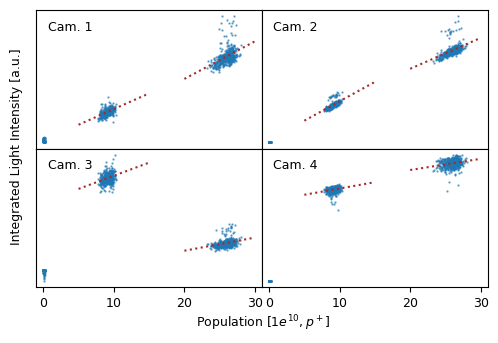

PyObject Text(0.4, 0.01, 'Population $[1e^{10}, p^+]$')

In [16]:
c1 = "C0"
c2 = "brown"

size = set_size(latex_width, fraction=1)

fig, ax = plt.subplots(2,2, figsize=size, sharex = true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])
ax[4].set_yticks([])


ax[1,1].text(0.05,0.85,"Cam. 1", transform=ax[1].transAxes, color="k", )
ax[1,2].text(0.05,0.85,"Cam. 2", transform=ax[1,2].transAxes, color="k",)
ax[2,1].text(0.05,0.85,"Cam. 3", transform=ax[2,1].transAxes, color="k",)
ax[2,2].text(0.05,0.85,"Cam. 4", transform=ax[2,2].transAxes, color="k",)


ax[4].set_xlim(-1, 31)

ax[1,1].scatter(charge, y1, s=0.5, color=c1, alpha=0.6)
ax[1,1].plot(ch1, lin_int11.(ch1), color=c2, linestyle=":")
ax[1,1].plot(ch2, lin_int21.(ch2), color=c2, linestyle=":")

ax[1,2].scatter(charge, y2, s=0.5, color=c1, alpha=0.6)
ax[1,2].plot(ch1, lin_int12.(ch1), color=c2, linestyle=":")
ax[1,2].plot(ch2, lin_int22.(ch2), color=c2, linestyle=":")

ax[2,1].scatter(charge, y3, s=0.5, color=c1, alpha=0.6)
ax[2,1].plot(ch1, lin_int13.(ch1), color=c2, linestyle=":")
ax[2,1].plot(ch2, lin_int23.(ch2), color=c2, linestyle=":")

ax[2,2].scatter(charge, y4, s=0.5, color=c1, alpha=0.6)
ax[2,2].plot(ch1, lin_int14.(ch1), color=c2, linestyle=":")
ax[2,2].plot(ch2, lin_int24.(ch2), color=c2, linestyle=":")

fig.text(0.08, 0.5, "Integrated Light Intensity [a.u.]", va="center", rotation="vertical")
fig.text(0.4, 0.01, L"Population $[1e^{10}, p^+]$", va="center", rotation="horizontal")

# fig.savefig("light-int.pdf", bbox_inches = "tight")